<div style="text-align: center;">
  <img src="Images/netflix-bg.jpeg" width="700" alt="Netflix Background">
</div>

<div style="background-color: #1a1a2e; padding: 25px; border-radius: 12px; border: 1px solid #16213e; max-width: 850px; margin: auto; text-align: center;">
    <h2 style="font-family: 'Helvetica Neue', Arial, sans-serif; color: #e94560; font-size: 40px; margin-bottom: 12px; font-weight: bold;">
        Exploratory Data Anlaysis 
    </h2>
    <p style="font-family: 'Roboto', sans-serif; color: #c4c4c4; font-size: 26px; margin-top: 10px; text-align: center;">
                            Netflix Movies and TV Shows Dataset
    </p>
</div>

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

#### Loading Dataset

In [3]:
df = pd.read_csv('Data/netflix_titles.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8809, 26)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
# Checking for Misising Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [7]:
# Checking Duplicates
df.duplicated().sum()

0

## Data Cleaning

#### Dropping all the Unnamed columns as they have all NaN values (8809)

In [8]:
def drop_unnamed_columns(df, start=12, end=25):
    columns_to_drop = [f'Unnamed: {i}' for i in range(start, end + 1)]
    df.drop(columns = columns_to_drop, axis=1, inplace=True)

drop_unnamed_columns(df)

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### These columns have very less NaN values so will drop those rows.

In [10]:
df.dropna(subset=['date_added','rating','duration'], axis=0, inplace=True)

#### Director, Cast, Country: Will fill them with 'Unknown'.

In [11]:
columns_to_fill = ['director', 'cast', 'country']
for col in columns_to_fill:
    df[col] = df[col].fillna('Unknown')

#### Inspecting Rating Column

In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A'], dtype=object)

#### In our country, Netflix uses the following TV and movie ratings:
https://help.netflix.com/en/node/2064/us

<img src="Images/img-1.png" width=600 />

<img src="Images/img-2.png" width=600 />

In [13]:
df['rating'].value_counts()

rating
TV-MA       3206
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64

#### Grouping Ratings into Categories used by Netflix

In [14]:
rating_mapping = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-G': 'Kids', 'G': 'Kids', 'PG': 'Kids', 'TV-PG': 'Kids', 
    'TV-Y7-FV': 'Kids', 
    'PG-13': 'Teens', 'TV-14': 'Teens',
    'NC-17': 'Adults', 'TV-MA': 'Adults', 'R': 'Adults', 'NC-17':'Adults' ,'A': 'Adults',
    'NR': 'NotRated', 'UR': 'UnRated'
}
df['age_group'] = df['rating'].map(rating_mapping)

In [15]:
#Excluding NR and UR from Analysis
df = df[~df['rating'].isin(['NR', 'UR'])]

In [16]:
df.shape

(8710, 13)

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
age_group       0
dtype: int64

In [18]:
df.shape

(8710, 13)

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8710 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8710 non-null   object
 1   type          8710 non-null   object
 2   title         8710 non-null   object
 3   director      8710 non-null   object
 4   cast          8710 non-null   object
 5   country       8710 non-null   object
 6   date_added    8710 non-null   object
 7   release_year  8710 non-null   int64 
 8   rating        8710 non-null   object
 9   duration      8710 non-null   object
 10  listed_in     8710 non-null   object
 11  description   8710 non-null   object
 12  age_group     8710 non-null   object
dtypes: int64(1), object(12)
memory usage: 952.7+ KB


#### Converting 'date_added' to datetime format

In [21]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens


#### Converting duration into numerical format (i.e, minutes for movies and episodes for TV shows).
#### Steps:
1. Identify Movies and TV Shows.
2. Extracting Numeric Values: For movies, extracting the number of minutes. For TV shows, extracting the number of seasons.
3. Convert to Integer

In [22]:
df['duration'][0]

'90 min'

In [23]:
df['duration'][1]

'2 Seasons'

In [24]:
def convert_duration(row):
    if row['type'] == 'Movie':
        return int(row['duration'].replace(' min', ''))
    elif row['type'] == 'TV Show':
        return int(row['duration'].replace(' Season', '').replace('s', ''))   # Handling both 'Season' and 'Seasons'

df['duration_num'] = df.apply(convert_duration, axis=1)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,1


#### Creating a new column 'Year Added' which represents year in which Movie/TV Show was added in Netflix.

In [25]:
df['year_added'] = df['date_added'].dt.year
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,duration_num,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,90,2021


#### New Column: Content Age = year_added - release_year
1. To understand how recent or old the content was when it was added to Netflix.

In [26]:
df['content_age'] = df['year_added'] - df['release_year']
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,duration_num,year_added,content_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,90,2021,1


In [27]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'age_group', 'duration_num', 'year_added', 'content_age'],
      dtype='object')

## 1. Content Distribution Analysis

####  Distribution of Movies vs. TV Shows

In [28]:
df['type'].value_counts()

type
Movie      6049
TV Show    2661
Name: count, dtype: int64

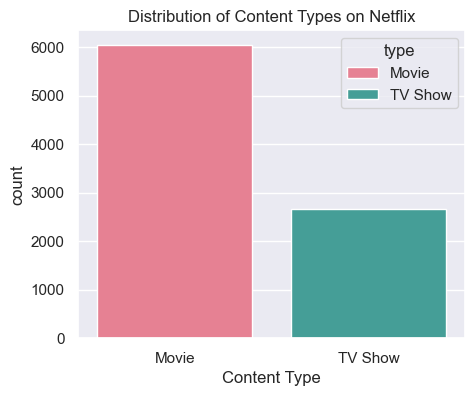

In [29]:
sns.set(rc={'figure.figsize':(5,4)})
palette = sns.color_palette("husl", len(df['type'].unique()))
sns.countplot(x='type', data=df, hue='type', palette=palette, legend=True)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.show()

#### This means that Netflix has more movies than TV shows, with approximately 70% of the content being movies and 30% being TV shows.

##  2. Release Year Analysis

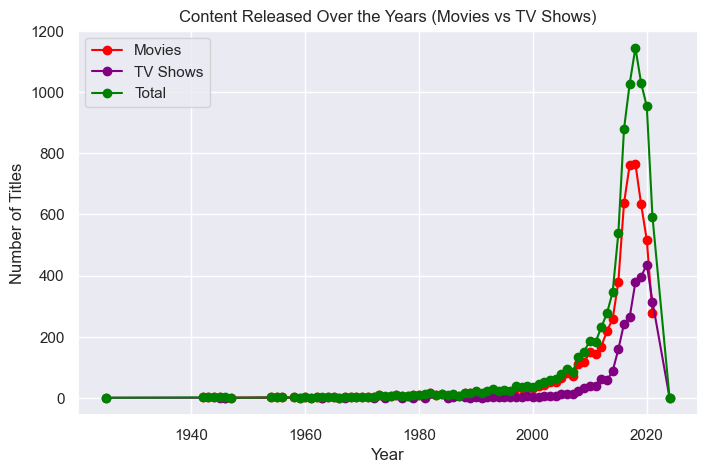

In [30]:
# Grouping by 'release_year' and 'type' for Movies and TV Shows
content_released_movies = df[df['type']=='Movie'].groupby('release_year').size()
content_released_tv_shows = df[df['type'] == 'TV Show'].groupby('release_year').size()

# Grouping by 'release_year' for Total content (Movies + TV Shows)
content_released_total = df.groupby('release_year').size()

plt.figure(figsize=(8, 5))
# Plotting Movies, TV Shows, and Total
plt.plot(content_released_movies.index, content_released_movies, label="Movies", marker='o', color='red')
plt.plot(content_released_tv_shows.index, content_released_tv_shows, label="TV Shows", marker='o', color='purple')
plt.plot(content_released_total.index, content_released_total, label="Total", marker='o', color='green')
plt.title("Content Released Over the Years (Movies vs TV Shows)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend() 
plt.grid(True)
plt.show()

* There is an increase in content released over the years with more Movies released than TV Shows and with spike around 2019-2020 for both the types.

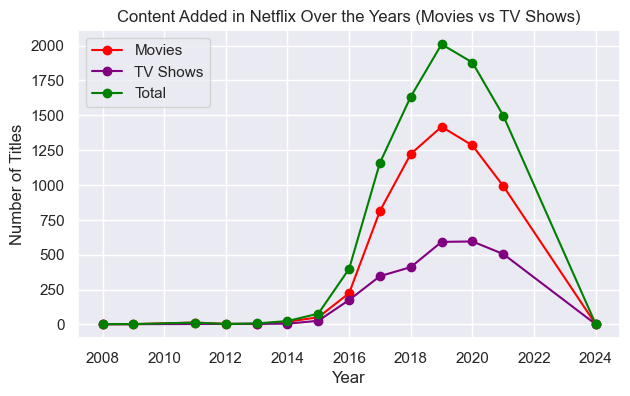

In [31]:
# Grouping by 'year_added' and 'type' for Movies and TV Shows
content_over_time_movies = df[df['type']=='Movie'].groupby('year_added').size()
content_over_time_tv_shows = df[df['type'] == 'TV Show'].groupby('year_added').size()

# Grouping by 'year_added' for Total content (Movies + TV Shows)
content_over_time_total = df.groupby('year_added').size()

plt.figure(figsize=(7, 4))
# Plotting Movies, TV Shows, and Total
plt.plot(content_over_time_movies.index, content_over_time_movies, label="Movies", marker='o', color='red')
plt.plot(content_over_time_tv_shows.index, content_over_time_tv_shows, label="TV Shows", marker='o', color='purple')
plt.plot(content_over_time_total.index, content_over_time_total, label="Total", marker='o', color='green')
plt.title("Content Added in Netflix Over the Years (Movies vs TV Shows)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend() 
plt.grid(True)
plt.show()

* Conclusion: From 2015, there is a significant increase in content added, with notable peaks in 2019 and 2020. These spikes align with the COVID-19 pandemic, which likely accelerated digital content demand due to lockdowns and global restrictions. This led platforms to expand their catalogs rapidly to meet audience needs. Although there was a slight drop in 2021, the platform still maintains a high volume of content, indicating continued strong expansion.

## 3. Genre Analysis-
1. Investigating the genres (listed_in) and identifying the most common genres for movies and TV shows.

In [32]:
df['listed_in'][4]

'International TV Shows, Romantic TV Shows, TV Comedies'

#### 1) Separating Data by Content Type

In [33]:
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

#### 2) Splitting and Counting Genres

In [34]:
def get_genre_counts(df):
    genres = df['listed_in'].str.split(', ').explode()
    genre_counts = Counter(genres) #Utilizing the Counter from the collections module to count the frequency of each genre.
    return genre_counts

movie_genre_counts = get_genre_counts(movies_df)
tv_show_genre_counts = get_genre_counts(tv_shows_df)

#### 3) Converting the counts to DataFrames

In [35]:
movie_genre_df = pd.DataFrame(movie_genre_counts.items(), columns=['Genre', 'Count'])
movie_genre_df = movie_genre_df.sort_values(by='Count', ascending=False)

tv_show_genre_df = pd.DataFrame(tv_show_genre_counts.items(), columns=['Genre', 'Count'])
tv_show_genre_df = tv_show_genre_df.sort_values(by='Count', ascending=False)

In [36]:
movie_genre_df.head(3)

,Genre,Count
4,International Movies,2716
2,Dramas,2397
5,Comedies,1659


In [37]:
tv_show_genre_df.head(3)

,Genre,Count
0,International TV Shows,1347
1,TV Dramas,761
8,TV Comedies,573


In [38]:
print(f'Number of Genres found in Movies: {movie_genre_df.shape[0]}')
print(f'Number of Genres found in TV Shows: {tv_show_genre_df.shape[0]}')

Number of Genres found in Movies: 23
Number of Genres found in TV Shows: 25


#### 4) Visualizing the Results

In [39]:
def plot_Top_Ten_genres(df, genre_column, count_column, content_type='Movies', top_n=15, color_scale='Blues', width=10, height=4):
    # Sort the dataframe by count_column and select the top N genres
    top_genres = df.sort_values(by=count_column, ascending=True).head(top_n)
    
    colors = sns.color_palette(color_scale, n_colors=top_n)
    plt.figure(figsize=(width, height))
    plt.barh(top_genres[genre_column], top_genres[count_column], color=colors)
    plt.title(f'Top {top_n} {content_type} Genres', fontsize=16)
    plt.xlabel(f'Number of {content_type}', fontsize=14)
    plt.ylabel('Genre', fontsize=14)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

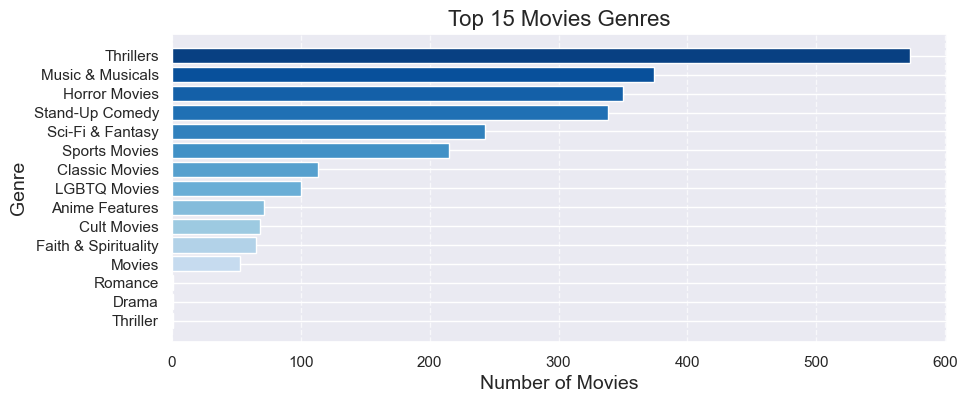

In [40]:
plot_Top_Ten_genres(movie_genre_df, 'Genre', 'Count',
                    content_type = 'Movies', top_n = 15)

#### Observations:
* Diversity of Genres: The Netflix catalog is diverse, covering a wide range of genres from action-packed movies to documentaries, comedy, family-friendly content, and niche genres like stand-up comedy.
* Global Appeal: International Movies and genres like Drama, Documentaries, and Independent Movies suggest that Netflix caters to a global audience, offering a variety of regional content.
* Balance of Content: Netflix has a strong balance of mainstream genres (Drama, Comedy, Action) and more specialized genres (Horror, Sci-Fi, Sports), catering to different tastes.

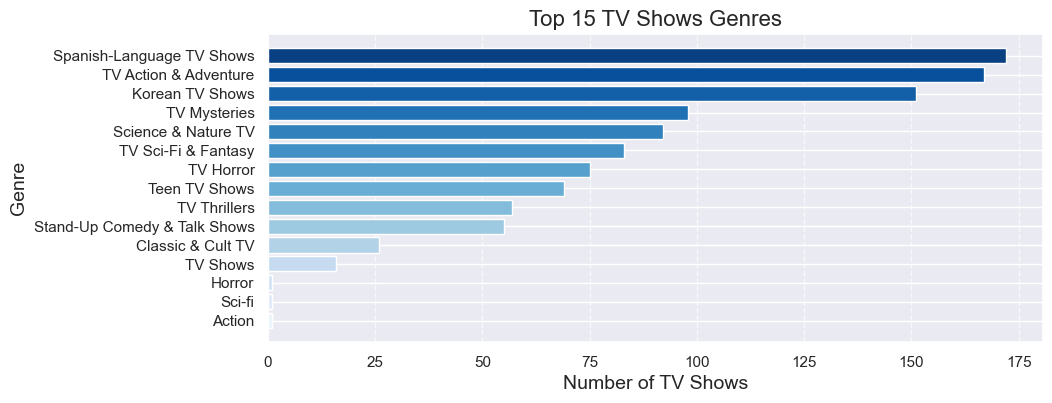

In [41]:
plot_Top_Ten_genres(tv_show_genre_df, 'Genre', 'Count',
                    content_type = 'TV Shows', top_n = 15)

#### Observations:
* Global and Diverse Content: Just like with movies, Netflix offers a wide range of TV genres that cater to both global and regional tastes. International TV Shows, British TV Shows, Spanish-Language TV Shows, and Korean TV Shows demonstrate Netflix's commitment to international content, while the variety of genres ensures broad audience appeal.
* Strong Narrative Focus: Genres like TV Dramas, Crime TV Shows, Docuseries, and Romantic TV Shows highlight Netflix’s emphasis on strong narratives and emotional engagement, which are key drivers for TV show viewership.
* Popular Reality & Animated Content: Reality TV and Anime Series are genres with specific fan bases that Netflix continues to prioritize, showcasing unscripted content and popular animation.

#### Areas Where Netflix Can Improve:

 1. Expand Sci-Fi, Fantasy, and Horror Content: Genres like Sci-Fi & Fantasy (243 for movies) and Horror Movies (357) are underrepresented compared to other genres like drama and comedy.
 2. Children’s Content Expansion: While Kids' TV (448) and Children & Family Movies (641) are represented, Netflix could focus more on original children’s programming. Competitors like Disney+ dominate in this segment.
 3. Better Balance of Reality TV: With only 255 Reality TV shows, Netflix could improve by tapping further into the reality TV trend, which has proven to be immensely popular on platforms like Hulu, Amazon, and traditional cable networks.

## 4. Country Based Analysis

####  Content Diversity by Country-

1. Understanding which countries produce the most content available on Netflix.

In [42]:
df['country'].nunique()

740

In [43]:
# Excluding "Unknown" from the country counts
country_counts = df.loc[df['country'] != 'Unknown', 'country'].value_counts()
top_countries = country_counts.head(15)
print(top_countries)

country
United States     2775
India              968
United Kingdom     413
Japan              243
South Korea        197
Canada             179
Spain              144
France             123
Egypt              106
Mexico             106
Turkey             104
Nigeria             94
Australia           84
Taiwan              81
Indonesia           79
Name: count, dtype: int64


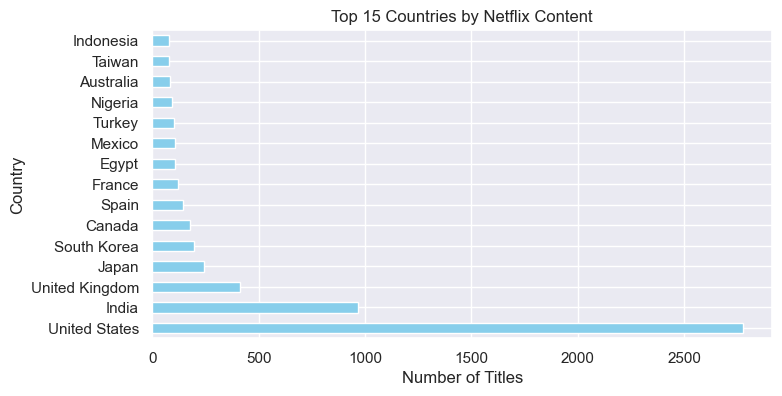

In [44]:
top_countries.plot(kind='barh', figsize=(8, 4), color='skyblue')
plt.title('Top 15 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### Observation: 
* Netflix’s content library is heavily influenced by its dominant markets, the United States, and expanding international content from countries like India, South Korea, and Japan. While Netflix is already focused on providing diverse content for regional markets, there's still a large opportunity to further invest in localizing content, increasing original productions in emerging markets, and targeting niche genres to satisfy the tastes of a global audience. This approach will help Netflix sustain its lead in the global streaming market while growing its subscriber base across all continents.

#### Recommendations:
* Expand Regional Content for India: While Netflix’s Indian content library is significant, the diversity within the Indian market (multiple languages, regional cinema) presents an opportunity for deeper investment in local languages like Tamil, Telugu, Bengali, and Marathi.
* Increase Focus on K-Dramas & Anime: South Korea and Japan have shown a strong presence on Netflix, especially through their popular TV shows and anime series.
* Localized Content in Latin America & Africa: Countries like Mexico, Nigeria, and Turkey have a lot of untapped potential. Netflix could increase its investment in producing local content in these regions that speaks to their cultures, languages, and specific interests. For example, Turkey has a thriving drama industry, and Nigeria’s Nollywood is an emerging market for global entertainment.
* Strengthen French, Spanish & European Markets: Netflix should continue to build its presence in France, Spain, and other European countries by investing in original European content that caters to diverse tastes.
* Explore Niche Markets in Southeast Asia and Australia: Countries like Australia, Taiwan, and Indonesia could offer interesting opportunities for genre-specific content, like sci-fi, thrillers, or romantic dramas. 

#### Content Type by Country (Movies vs. TV Shows)
1. Understanding which countries produce more movies or TV shows.

In [45]:
country_type = df.groupby(['country','type']).size().reset_index(name='count')
country_type_pivot = country_type.pivot(index='country', columns='type', values='count').fillna(0)

In [46]:
top_country_type = country_type_pivot.loc[country_counts.index[:10]]
top_country_type

type,Movie,TV Show
country,,
United States,2022.0,753.0
India,889.0,79.0
United Kingdom,203.0,210.0
Japan,76.0,167.0
South Korea,38.0,159.0
Canada,120.0,59.0
Spain,97.0,47.0
France,74.0,49.0
Egypt,92.0,14.0


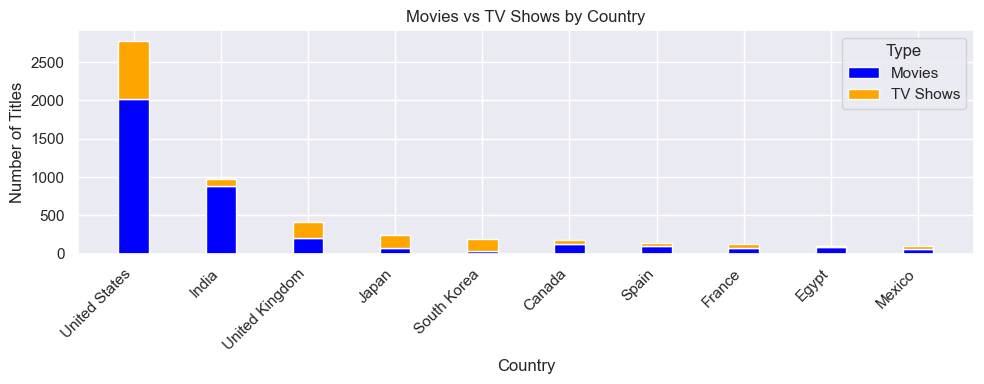

In [47]:
fig, ax = plt.subplots(figsize=(10, 4))

ind = np.arange(len(top_country_type))
width = 0.35  # width of the bars
# Plot the 'Movies' and 'TV Show' bars
ax.bar(ind, top_country_type['Movie'], width, label='Movies', color='blue')
ax.bar(ind, top_country_type['TV Show'], width, bottom=top_country_type['Movie'], label='TV Shows', color='orange')

ax.set_title('Movies vs TV Shows by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_xticks(ind)
ax.set_xticklabels(top_country_type.index, rotation=45, ha='right')
ax.legend(title='Type')
plt.tight_layout()
plt.show()

1. In most countries (U.S., India, Canada, Spain, France, Mexico, and Egypt), the production of Movies significantly exceeds that of TV Shows.
2. The U.K. is unique in its near-equal production of Movies and TV Shows.
3. TV Show dominance in East Asia: Both Japan and South Korea show a clear preference for TV Show content over Movies, which contrasts with the rest of the countries.

## 5. Rating Analysis:

#### Content Ratings Distribution:

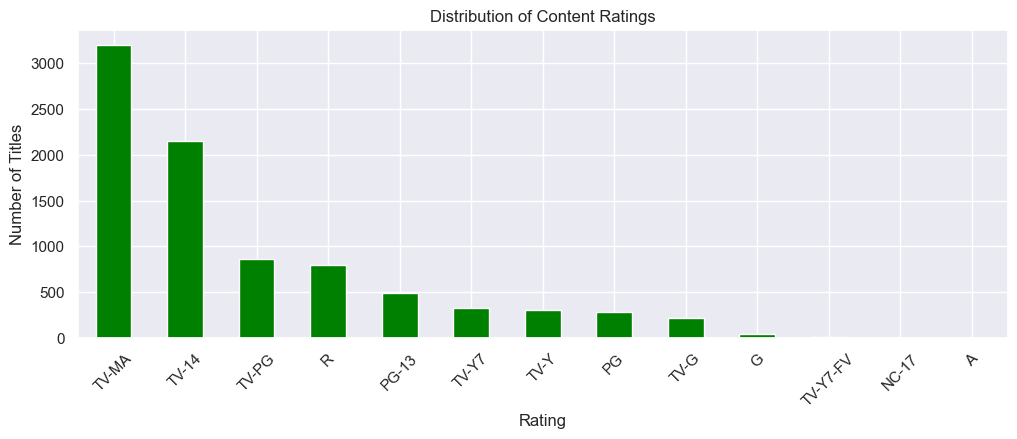

In [48]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(12, 4))
rating_counts.plot(kind='bar', color='green')
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [49]:
age_group_counts = df['age_group'].value_counts()
age_group_counts

age_group
Adults    4009
Teens     2647
Kids      2054
Name: count, dtype: int64

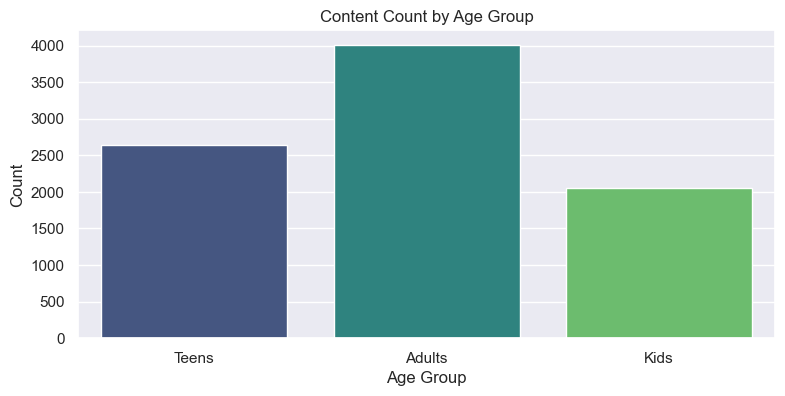

In [50]:
plt.figure(figsize=(9, 4))
sns.countplot(x='age_group', data=df, hue='age_group' ,palette='viridis')
plt.title('Content Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

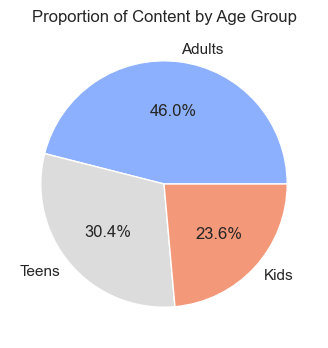

In [51]:
plt.figure(figsize=(7, 4))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(age_group_counts)))
plt.title('Proportion of Content by Age Group')
plt.show()

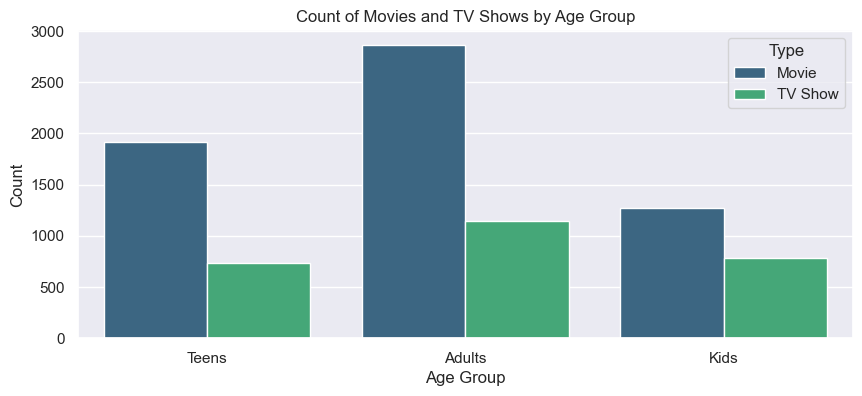

In [52]:
plt.figure(figsize=(10, 4))
sns.countplot(x='age_group', hue='type', data=df, palette='viridis')
plt.title('Count of Movies and TV Shows by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

## Relationship between Genres and Ratings (Age Group)

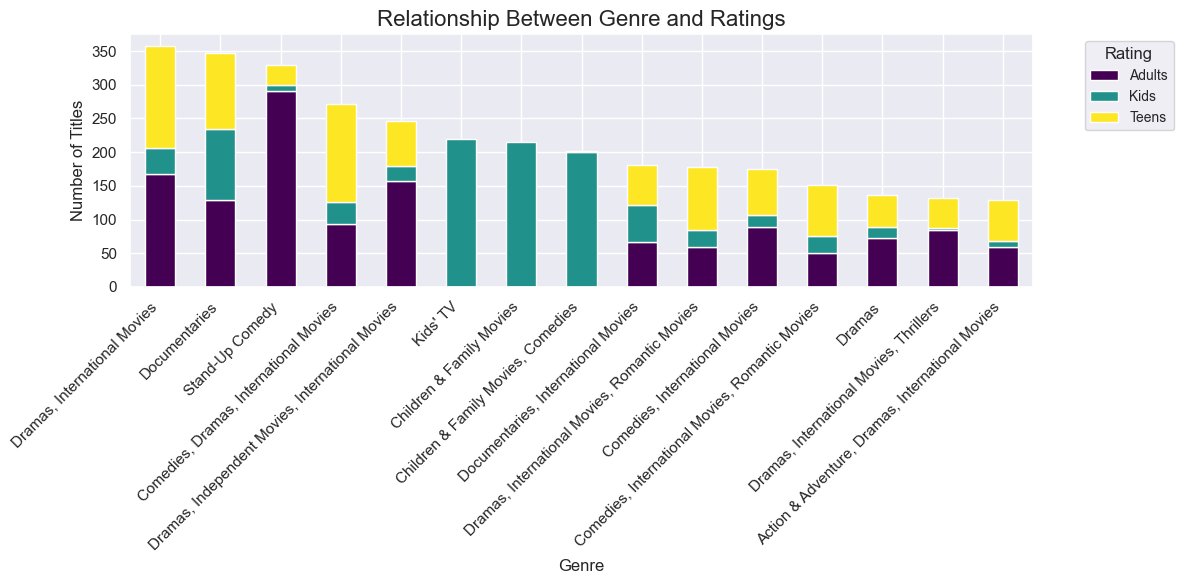

In [53]:
# Group by genre and rating, counting occurrences
genre_rating = df.groupby(['listed_in', 'age_group']).size().unstack(fill_value=0)

# Selecting top genres by total count
top_genres = genre_rating.sum(axis=1).sort_values(ascending=False).head(15)
genre_rating_top = genre_rating.loc[top_genres.index]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
genre_rating_top.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Relationship Between Genre and Ratings', fontsize=16)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.legend(title='Rating', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observations:
* Adults Dominate Across Genres: Most content, like Stand-Up Comedy (291) and Dramas, International Movies (167), is targeted toward adults, indicating they are the primary audience.
* Kids-Centric Genres: Kids' TV (219) and Children & Family Movies (215) focus exclusively on children, with little overlap with other age groups.
* Balanced Genres: Genres like Documentaries and Dramas, International Movies, Romantic Movies show a mix of content appealing to all age groups, including teens.
* Teens-Focused Content: Some genres like Comedies, Dramas, International Movies (146 for teens) and Romantic Movies have notable appeal for the teenage audience.

#### Recommendations:
* Expand Teen-Centric Content:Develop more teen-focused genres like romantic comedies or thrillers, as teens engage actively in genres like Dramas, International Movies, Romantic Movies.
* Broaden Kids' Offerings: Invest in new genres for kids beyond Kids' TV and Children & Family Movies, such as animated adventure series or educational documentaries.
* Enhance International Appeal: Genres like Dramas, International Movies show strong engagement across age groups. Expanding such genres in diverse languages and regions can boost global reach.
* Diversify Adult Genres: While adults dominate most categories, experimenting with genre crossovers like Documentaries with Thrillers or Stand-Up Comedy with Dramas could attract more viewership.

## 6. Duration Analysis

#### Duration Trends for Movies:

Text(0, 0.5, 'Frequency')

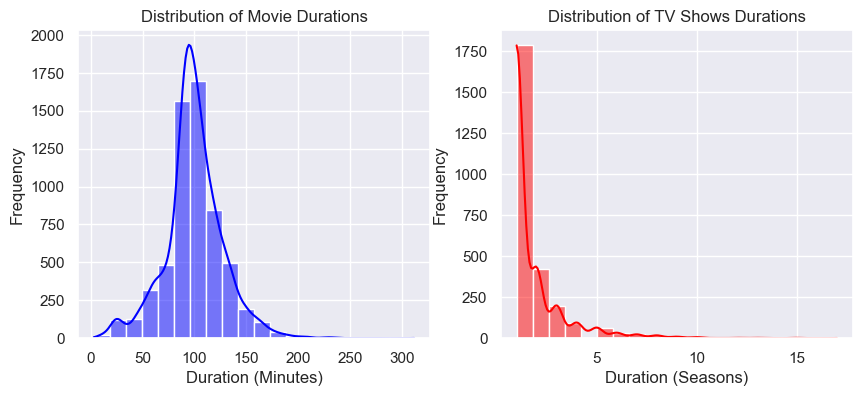

In [54]:
# Filter the dataset to include only movies and tv shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Plotting the distribution
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(movies_df['duration_num'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(tv_shows_df['duration_num'], bins=20, kde=True, color='red')
plt.title('Distribution of TV Shows Durations')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Frequency')

#### Movie Duration Insights:
* Peak Duration: Most movies have durations between 90 to 120 minutes, indicating this range is the industry standard or most preferred by audiences.
* Skewness: The distribution appears slightly right-skewed, meaning there are fewer movies with longer durations (beyond 150 minutes).

#### TV Show Duration Insights:
* Peak Duration: The majority of TV shows have a duration of 1-2 seasons, suggesting shorter series are more prevalent.
* Declining Trend: The frequency of TV shows decreases sharply after 3 seasons, highlighting that fewer shows sustain extended runs.

#### Recommendations:
#### For Movies:
* Content Creation: Focus on movies in the 90–120 minute range, as these appear to be the most common and likely preferred by viewers.
* Experimentation: Consider producing slightly shorter films (<90 minutes) for audiences with shorter attention spans (e.g., teens).
#### For TV Shows:
* Shorter Series: Emphasize producing TV shows with 1-3 seasons, as they dominate the distribution.
* Niche Audience: Longer series (>10 seasons) may appeal to a loyal, niche audience but require consistent quality to maintain engagement.

    * Categorization: Platforms like Netflix can use this data to create categories like "Quick Movies" (<90 minutes) and "Short Series" (1-2 seasons) for better audience targeting.
    * Promotion: Highlight successful long-running TV shows as premium content to attract binge-watchers.